# Исследование надежности заемщиков

Это первая часть проекта, она будет проверена автоматически. Вторую часть проверит ревьюер. 

## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd
import numpy as np

In [2]:
try:
    data = pd.read_csv(r"C:\Users\Aleksandr\Downloads\data.csv")
except:
    data = pd.read_csv("/datasets/games.csv")
print(f'Shape data is {data.shape}')

Shape data is (21525, 12)


**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [5]:
print(data.isnull().sum())

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64


**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [6]:
data['total_income'] = (
  data.groupby('income_type')['total_income']
    .transform(lambda i: i.fillna(i.median()))
)

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. Таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [7]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [8]:
print(data.groupby('income_type')['days_employed'].median())

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64


У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [9]:
print(data['children'].unique())

[ 1  0  3  2 -1  4 20  5]


**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [10]:
data = data[~data['children'].isin((-1,20))]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [11]:
print(data['children'].unique())

[1 0 3 2 4 5]


### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждому типу занятости `income_type`.**

In [12]:
data['days_employed'] = (
  data.groupby('income_type')['days_employed']
    .transform(lambda i: i.fillna(i.median()))
)

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [13]:
print(data.isnull().sum())

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64


### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [14]:
data.total_income = data.total_income.astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [15]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [16]:
print(data.duplicated().value_counts())

False    21331
True        71
Name: count, dtype: int64


In [17]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [18]:
def categorize_income(income): 
    if income <= 30000: 
        return "E" 
    elif 30000 < income <= 50000: 
        return "D" 
    elif 50000 < income <= 200000: 
        return "C" 
    elif 200000 < income <= 1000000:
        return "B" 
    return "A"     

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)


**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [20]:
print(data.purpose.unique())

['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жилье'
 'операции со своей недвижимостью' 'автомобили' 'заняться образованием'
 'сделка с подержанным автомобилем' 'получение образования' 'автомобиль'
 'свадьба' 'получение дополнительного образования' 'покупка своего жилья'
 'операции с недвижимостью' 'получение высшего образования'
 'свой автомобиль' 'сделка с автомобилем' 'профильное образование'
 'высшее образование' 'покупка жилья для сдачи' 'на покупку автомобиля'
 'ремонт жилью' 'заняться высшим образованием']


**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [21]:
def categorize_purpose(list):
    if 'автомоб' in list:
        return 'операции с автомобилем'
    if 'образов' in list:
        return 'получение образования'
    if 'свадьб' in list:
        return 'проведение свадьбы'
    if 'недвижимо' in list:
        return 'операции с недвижимостью'
    if 'жил' in list:
        return 'операции с недвижимостью'
    
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

In [23]:
pd.crosstab(data['children'], data['debt'])

debt,0,1
children,,
0,13028,1063
1,4364,444
2,1858,194
3,303,27
4,37,4
5,9,0


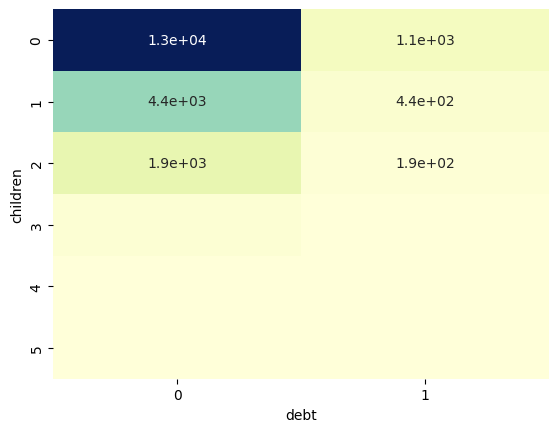

In [24]:
sns.heatmap(pd.crosstab(data['children'], data['debt']), 
            cmap="YlGnBu", annot=True, cbar=False);

In [25]:
from scipy.stats import chi2_contingency, fisher_exact
chi2_contingency(pd.crosstab(data['children'], data['debt']))

Chi2ContingencyResult(statistic=20.117395586863267, pvalue=0.0011878936268035906, dof=5, expected_freq=array([[1.29468618e+04, 1.14413820e+03],
       [4.41760780e+03, 3.90392199e+02],
       [1.88538503e+03, 1.66614974e+02],
       [3.03205194e+02, 2.67948057e+01],
       [3.76709484e+01, 3.32905162e+00],
       [8.26923257e+00, 7.30767428e-01]]))

**Вывод:**  Статистика теста: хи-квадрат = 20.117, р-значение = 0.0011 степени свободы = 5. Поскольку p-значение (0.0011) теста меньше 0,05, мы можем сказать, что существует связь между количеством детей и возвратом кредита в срок.

In [26]:
children_dept = data.pivot_table(index = ['children'], values='debt', aggfunc = ('mean', lambda i:
                                                                       i.count()))

def percent(x):
    return "{0:.2%}".format(x)

children_dept['mean'] = children_dept['mean'].apply(percent)
children_dept = children_dept.rename(columns={"<lambda_0>": "Количество записей", "mean": "Доля просроченых заемов"})
children_dept.sort_values(by='Количество записей', ascending=False)

,Количество записей,Доля просроченых заемов
children,,
0,14091,7.54%
1,4808,9.23%
2,2052,9.45%
3,330,8.18%
4,41,9.76%
5,9,0.00%


**Вывод:** Заемщики, не имеющие детей, менее склонны к просрочке по выплатам кредита, возможны кредиты меньшего размера и их легче отдавать. На втором месте расположились клиенты с 3-я детьми. На 3 ,4 и 5 местах расположились семьи с 1-м, 2-я и 4-я детьм соотвественно, опираясь на логику описанную в предидущем предложении, могу предположить, что семьи с 1-м и 2-я детьми берут кредит разово, поэтому не сильно ориентируются на срок выплат.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [27]:
pd.crosstab(data['family_status'], data['debt'])

debt,0,1
family_status,,
Не женат / не замужем,2523,273
в разводе,1105,84
вдовец / вдова,888,63
гражданский брак,3749,385
женат / замужем,11334,927


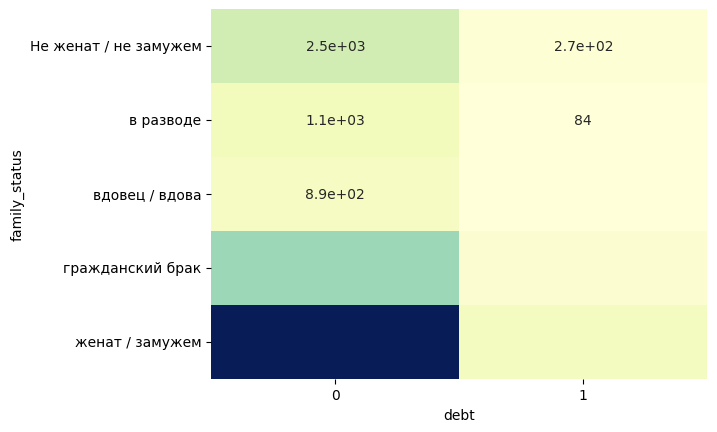

In [28]:
sns.heatmap(pd.crosstab(data['family_status'], data['debt']), 
            cmap="YlGnBu", annot=True, cbar=False);

In [29]:
chi2_contingency(pd.crosstab(data['family_status'], data['debt']))

Chi2ContingencyResult(statistic=27.784522630372297, pvalue=1.3792030784697729e-05, dof=4, expected_freq=array([[ 2568.97491913,   227.02508087],
       [ 1092.45750316,    96.54249684],
       [  873.78224181,    77.21775819],
       [ 3798.33416155,   335.66583845],
       [11265.45117435,   995.54882565]]))

**Статистика теста: хи-квадрат = 27.784, р-значение = 1.3792-05 степени свободы = 4. Поскольку p-значение (1.3792-05) теста меньше 0,05, мы можем сказать, что существует связь между семейным положением и возвратом кредита в срок.**

In [30]:
debt_from_family_status = data.pivot_table(index = ['family_status'], values='debt', aggfunc = ('mean', lambda i:
                                                                       i.count()))

def percent(x):
    return "{0:.2%}".format(x)

debt_from_family_status['mean'] = debt_from_family_status['mean'].apply(percent)
debt_from_family_status = debt_from_family_status.rename(columns={"<lambda_0>": "Количество записей", "mean": "Среднее"})
debt_from_family_status.sort_values(by='Количество записей', ascending=False)

,Количество записей,Среднее
family_status,,
женат / замужем,12261,7.56%
гражданский брак,4134,9.31%
Не женат / не замужем,2796,9.76%
в разводе,1189,7.06%
вдовец / вдова,951,6.62%


**Вывод:** Люди не в браке и не бывавшие в браке имеют больший процент невозвратов в срок. Как видно из таблицы, вдовец/вдова самые отвественные из клиентов.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

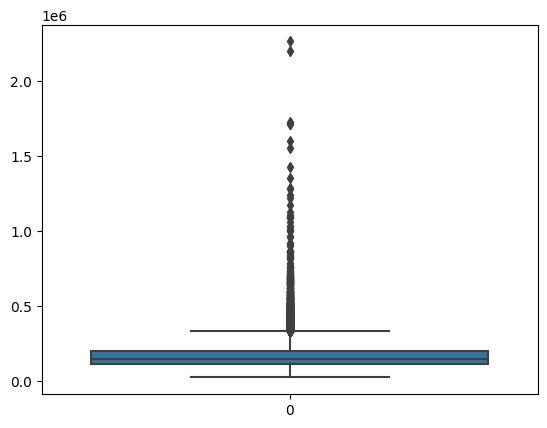

In [31]:
sns.boxplot(data['total_income']);

C:\Users\Aleksandr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleksandr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


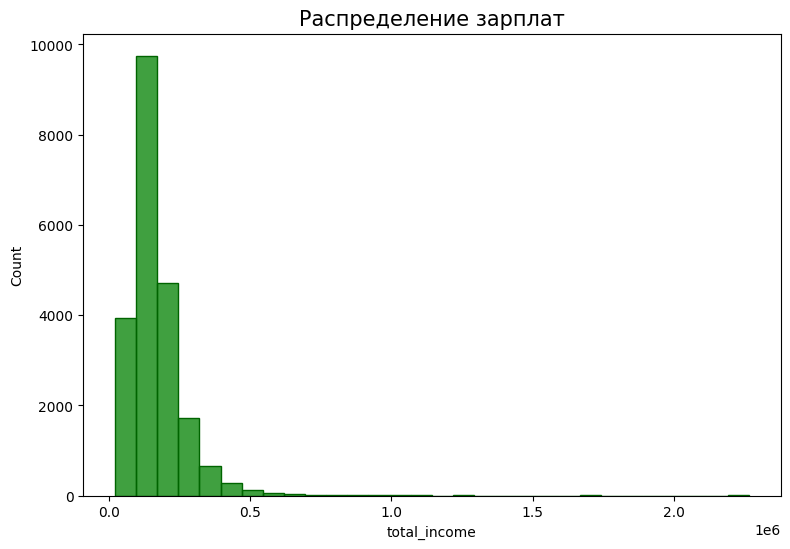

In [32]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_title('Распределение зарплат', fontsize=15)
sns.histplot(data.total_income,
             bins=30,
             ax=ax, 
             color='green',
             edgecolor='darkgreen');

Сейчас сложно сказать есть ли тут выбросы, скорее всего последние две точки точно, но уже понятен разброс зарплат. Этот коментарий к гипотизе о среднем значении при дальнейшем использовании датасета

In [33]:
def replace_income(total_income):
    if total_income >= 20667 and total_income <= 64145:
        return 'низкий'
    if total_income > 64145 and total_income <= 107623:
        return 'средний'
    if total_income > 107623 and total_income <= 156044:
        return 'выше среднего'
    if total_income > 156044 and total_income <= 195813:
        return 'высокий'
    if total_income > 195813:
        return 'очень высокий'
    
data['total_income_id'] = data['total_income'].apply(replace_income)

income = data.pivot_table(index = 'total_income_id', values='debt', aggfunc = ('mean', lambda X:
                                                                       X.count()))
def percent(x):
    return "{0:.2%}".format(x)

income['mean'] = income['mean'].apply(percent)
income = income.rename(columns={"<lambda_0>": "Количество записей", "mean": "Среднее по задолжностям"})
income.sort_values(by='Количество записей', ascending=False)

,Количество записей,Среднее по задолжностям
total_income_id,,
выше среднего,6914,8.72%
очень высокий,5336,7.14%
средний,4304,8.32%
высокий,3741,8.58%
низкий,1036,6.66%


**Вывод:** Зависимости между уровнем дохода и возвратом кредита в срок нет!.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [34]:
'''Визуализация корреляции  целями кредита и возвратом кредита в срок'''
le = LabelEncoder()
data['purpose_label'] = le.fit_transform(data['purpose'])

purpose_category = data.pivot_table(index = ['purpose_category'], values='debt', aggfunc = ('mean', lambda X:
                                                                       X.count()))
def percent(x):
    return "{0:.2%}".format(x)

purpose_category['mean'] = purpose_category['mean'].apply(percent)
purpose_category = purpose_category.rename(columns={"<lambda_0>": "Количество записей", "mean": "Среднее по задолжностям"})
purpose_category.sort_values(by='Количество записей', ascending=False)

,Количество записей,Среднее по задолжностям
purpose_category,,
операции с недвижимостью,10751,7.26%
операции с автомобилем,4279,9.35%
получение образования,3988,9.25%
проведение свадьбы,2313,7.91%


C:\Users\Aleksandr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleksandr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleksandr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


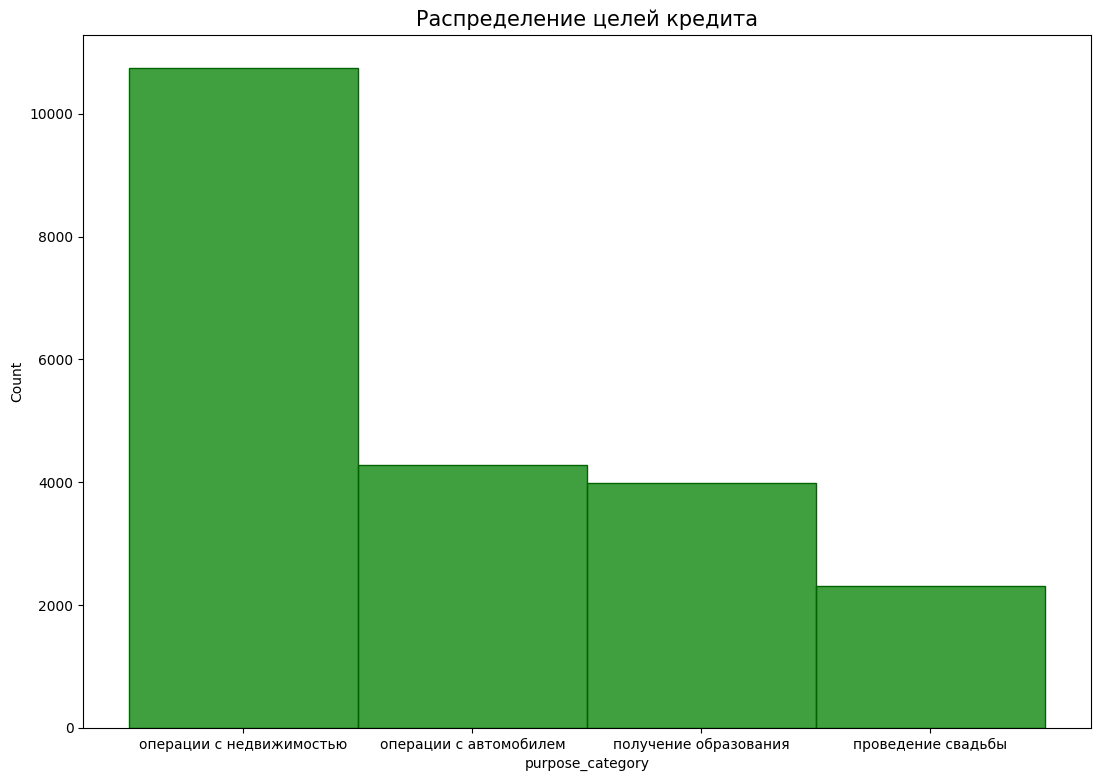

In [35]:
fig, ax = plt.subplots(figsize=(13, 9))
ax.set_title('Распределение целей кредита', fontsize=15)
sns.histplot(data.purpose_category,
             bins=30,
             ax=ax, 
             color='green',
             edgecolor='darkgreen', binwidth=0.05);

**Вывод:** Так 4 наших категорий, чаще всего платят в срок с целью кредита недвижимость, чаще просрочка у тех кому нужен кредит на авто и образование. Кредиты на свадьбу просрачивают реже.

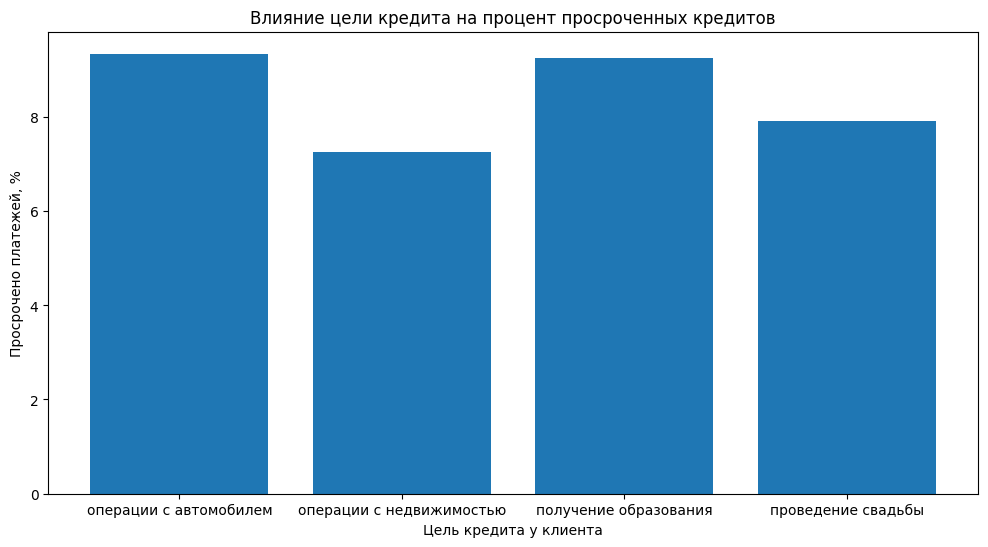

In [36]:
# Код ревьюера

import matplotlib.pyplot as plt

# группируем данные по цели кредита ('purpose_category'), затем применяем агрегирующие функции к столбцу 'debt'
grouped_data = data.groupby('purpose_category')['debt'].agg(['count', 'mean', 'sum'])
# функция reset_index используется для преобразования индекса в столбец данных
grouped_data.reset_index(inplace=True)
# задаем размер графика
plt.figure(figsize=(12, 6))  
# используем график к таблице, выбираем интересующие нас столбцы (проценты по одной оси и цель кредита по другой)
plt.bar(grouped_data['purpose_category'], grouped_data['mean']*100) # умножаем на 100, чтобы перевести в проценты
# подписываем
plt.title("Влияние цели кредита на процент просроченных кредитов")
plt.xlabel("Цель кредита у клиента")
plt.ylabel("Просрочено платежей, %")
plt.xticks(grouped_data['purpose_category'])
plt.show()

**Из диаграммы кореляции видно все зависимости**

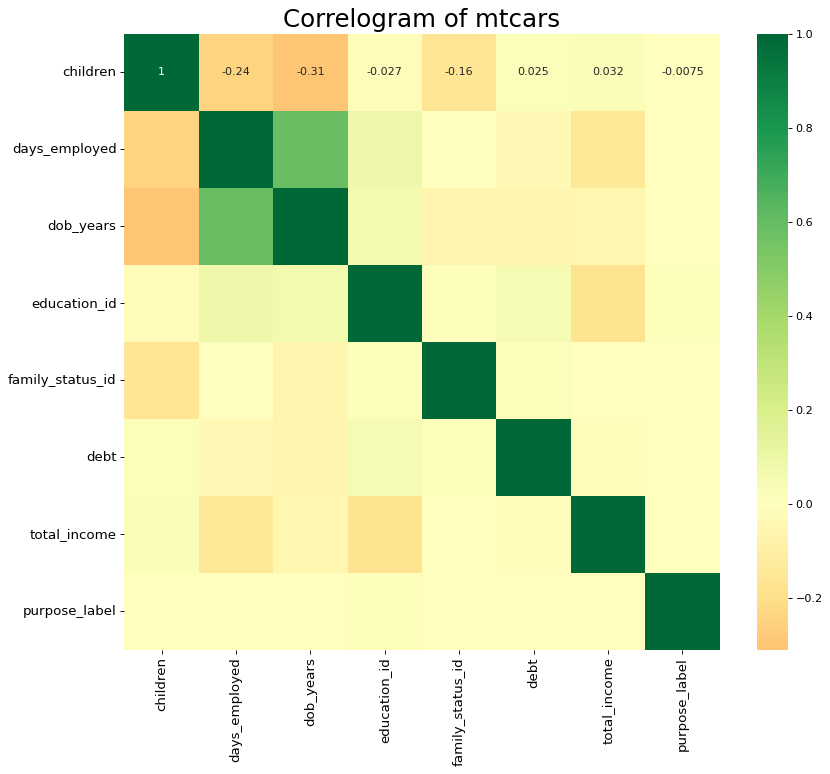

In [37]:
df = data.select_dtypes(include=[np.number])

plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Вывод** понять взаимосвязь между всеми возможными парами числовых переменных в двумерном анализе возможно таким образом

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Ошибки ввода данных, сокрытие информации, фрод. Фрод — это мошенничество в банковской сфере. Пропуски бывают: Полностью случайные,Такие пропуски возникают, например, если измерительный прибор неисправен и случайным образом не записал часть наблюдений. Случайные пропуски, вероятность появления пропуска зависит от некоторой известной нам переменной. Например, отсутствие ответа на определенный вопрос анкеты может зависеть от возраста респондента. Неслучайные пропуски вероятность появления пропуска зависит, в том числе, от фактора, о котором мы ничего не знаем. Например, у весов может быть верхний предел измерения и любой образец выше этого предела автоматически не записывается.

Хищение денежных средств заемщиком путем представления банку или иному кредитору заведомо ложных и (или) недостоверных сведений. Завышение доходов, обман в статусе заемщика.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Медиана более стабильная характеристика, так как на нее не влияют случайные выбросы и шум. Если данные имеют нормальное распределение и их количество велико, то медиана будет равняться среднему значению.

### Шаг 4: общий вывод.

**Вывод**: Входные данные от банка — статистика о платёжеспособности клиентов. Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

Сделана предобработка данных: 
   1. Замена типов данных для анализа
   2. Обработка дубликатов
   3. Лемматизация целей
   4.  Категоризация данных
   5. Определение зависимостей

1. Колонка children - Идеальным клиентом считается: Взрослая семья с 5-ю детьми. Худшим клиентом является: Молодая семья  с (4+) - детьми. Разница между минимальным и максимальным средними значениями равна 64%.
2. Колонка family_status - Идеальным клиентом считается: Врозслый человек в разводе. Худшим клиентом является: Молодые люди в разводе. Разница между минимальным и максимальным средними значениями равна 56,6%.
3. Колонка total_income - Идеальным клиентом считается: Врозслый человек c низким доходом. Худшим клиентом является: Молодые люди с доходом выше среднего. Разница между минимальным и максимальным средними значениями равна 52%.
4. Колонка purpose - Идеальным клиентом считается: Врозслый человек c целью покупки недвижимости. Худшим клиентом является: Молодые люди с целью образование. Разница между минимальным и максимальным средними значениями равна 48,4%. Исходя из этого анализа большую зависимость имеет Категория - children.

В целом, бездетные семья реже допускает задержки в платежах по кредиту, % должников держится на уровне 7.54%, но данные не однозначные, возможно, нужна большая выборка, чем та, которую мы имеем. У группы клиентов, которые находятся или когда-либо находились в браке % должников на уровне 7% - это ниже на 2.1% ниже, чем у людей никогда не состоявших в официальном браке. Уровень дохода напрямую коррелирует с возвратом кредита в срок - в зоне риска по просрочке платежа люди со средним заработком.
Чаще всего возвращают в срок кредиты на собственное жилье, а больше всего задержек по кредитам на автомобили и образование. У групп клиентов, целью кредита у которых является автомобиль и образование: 9.3% должников (на 1.2% выше среднего).
Резюмируя можно сказать, что разброс значений по просроченным платежам не превышает двух процентов (от 7 до 9%), что означает разницу в вероятности просрочки платежа на 20%.